# Feature Inspection

The complete set of extracted features, found in "extracted_features.csv", includes about 400 features, most of them highly redundant. Pruning them down to a manageable amount was done by first manually inspecting their behavior for different classes, then testing different groups of them through trial and error in ML models. In this notebook, we describe some of the manual inspecting we did for some features. The next notebook will cover the ML model construction and testing.

Import the required packages:

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

We load the complete feature set as well as the original metadata:

In [11]:
metadata_df = pd.read_csv('large_data/UrbanSound8K/metadata/UrbanSound8K.csv')

features_df = pd.read_csv('large_data/extracted_features.csv', index_col=0)
features_df.info()
features_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8732 entries, 0 to 8731
Columns: 402 entries, eq_0 to range_low.f0_stats.f0_min
dtypes: float64(401), int64(1)
memory usage: 26.8 MB


,eq_0,eq_10,eq_20,eq_30,eq_40,eq_60,eq_80,eq_120,eq_160,eq_230,...,range_high.f0_stats.f0_iqr,range_high.f0_stats.f0_max,range_high.f0_stats.f0_min,range_high.f0_signal,range_low.f0_stats.f0_mean,range_low.f0_stats.f0_median,range_low.f0_stats.f0_std,range_low.f0_stats.f0_iqr,range_low.f0_stats.f0_max,range_low.f0_stats.f0_min
0,0.042073,0.032028,0.035341,0.052309,0.219308,0.204393,0.247356,0.304356,0.908070,0.446898,...,7.156487,557.576667,544.841599,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,7.185887,6.635593,9.941734,6.079072,8.174761,5.269312,5.730459,2.863005,1.885250,1.618708,...,328.066133,2517.936841,2080.949703,0.109827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,6.597605,6.198449,5.251955,6.161898,5.299951,5.333605,5.835399,2.562814,1.899669,1.513398,...,850.982713,2230.306669,1077.167118,0.294798,1128.712229,1115.153334,36.960305,57.225801,1195.191751,1077.167118
3,5.929216,4.385479,5.181444,6.755984,4.012363,7.121256,6.199119,7.561980,2.231106,2.132915,...,53.988435,666.915289,523.251131,0.260116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,8.538324,4.343637,6.299134,11.781491,6.106678,6.938751,5.581585,3.884845,2.673044,2.055397,...,49.205062,2191.991335,2057.047957,0.156069,66.850514,65.785287,1.875716,1.731598,70.915367,65.406391


We can list the feature names/keys to see what is available:

In [7]:
feature_keys = list(features_df)
for k in feature_keys:
    print(k)

eq_0
eq_10
eq_20
eq_30
eq_40
eq_60
eq_80
eq_120
eq_160
eq_230
eq_300
eq_450
eq_600
eq_900
eq_1200
eq_1800
eq_2400
eq_3700
eq_5000
eq_7500
eq_10000
eq_15000
eq_20000
crestfactor
harmonic_power
percussive_power
harmonic_hits
percussive_hits
roll_32.y_mw_zcr
roll_32.y_mw_power_mcr
roll_32.spec_flatness.mean
roll_32.spec_flatness.median
roll_32.spec_flatness.std
roll_32.spec_flatness.iqr
roll_32.spec_flatness.max
roll_32.spec_flatness.min
roll_32.spec_flatness_mw.mean
roll_32.spec_flatness_mw.median
roll_32.spec_flatness_mw.std
roll_32.spec_flatness_mw.iqr
roll_32.spec_flatness_mw.max
roll_32.spec_flatness_mw.min
roll_32.spec_centroid.mean
roll_32.spec_centroid.median
roll_32.spec_centroid.std
roll_32.spec_centroid.iqr
roll_32.spec_centroid.max
roll_32.spec_centroid.min
roll_32.spec_centroid_mw.mean
roll_32.spec_centroid_mw.median
roll_32.spec_centroid_mw.std
roll_32.spec_centroid_mw.iqr
roll_32.spec_centroid_mw.max
roll_32.spec_centroid_mw.min
roll_32.spec_bandwidth.mean
roll_32.spec_band

As described in a previous notebook, we know that some of our data is very noisy or incorrectly labeled. As such, we expect some extreme outliers when examining features per class. We thus choose here to use box plots, as they present the outliers separately from the main batch of data for each class.

We define a helper function as all plots will follow the same form:

In [13]:
meta_and_features = pd.concat([metadata_df, features_df], axis=1)
def feature_boxplot(feature_key, ylim=None):
    seaborn.boxplot(data=meta_and_features, x='class', y=feature_key)
    plt.xticks(rotation=90)
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()

We're now ready to investigate a few features.

## Equalizer bands

The value in each equalizer band corresponds to the audio power in a particular range of frequencies. We plot a low frequency band, middling frequency band, and high frequency band. Gun shots appear to have very high power content in low frequencies. Higher frequencies have a slightly more spread out distribution in classes, but still exhibit some discrimination between certain classes.

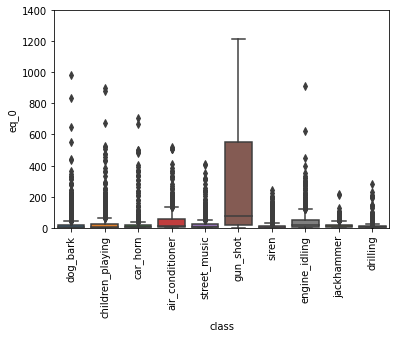

In [49]:
# Low frequency band
feature_boxplot('eq_0',[0, 1400])

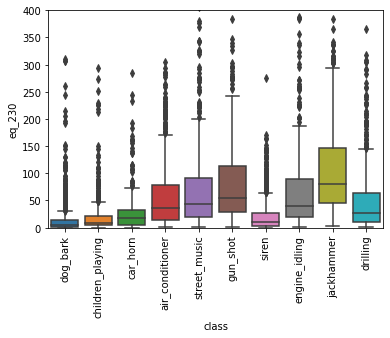

In [30]:
# Middling frequency band
feature_boxplot('eq_230',[0, 400])

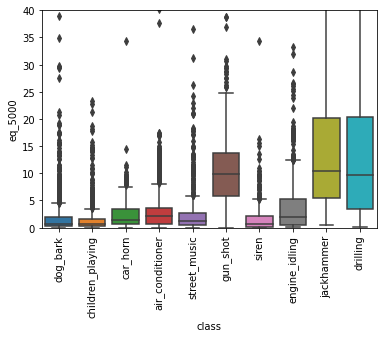

In [32]:
# High frequency band
feature_boxplot('eq_5000',[0, 40])

## Harmonic and Percussive components

Musicality of the samples differentiates between classes in an intuitive manner: car horns have high harmonic power, followed by sirens. Dog barks and gun shots have high percussive power. Engine idling and jackhammers, due to their constant 'beat', register high percussive hits. Unfortunately, it seems street music does not register strongly with these features, possibly due to the noise inherent in their samples.

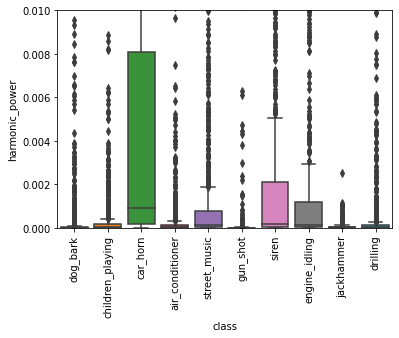

In [47]:
# Harmonic power
feature_boxplot('harmonic_power',[0,0.01])

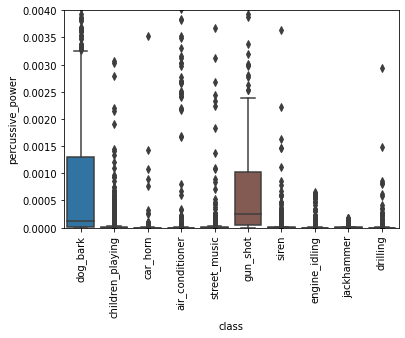

In [44]:
# Percussive power
feature_boxplot('percussive_power',[0,0.004])

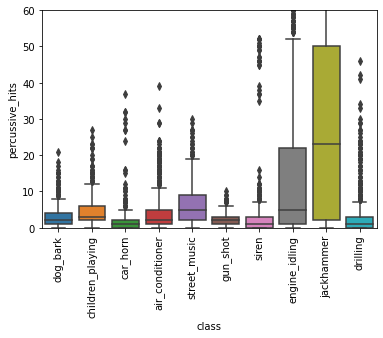

In [38]:
# Percussive hits
feature_boxplot('percussive_hits',[0,60])

## Crestfactor

Crestfactors, as a measure of "suddenness", interesting picks up gun shots, dog barks, and children playing. We believe that is because of the suddenness of children shouts and dog barks causing spikes in the wave form in a manner akin to gun shots.

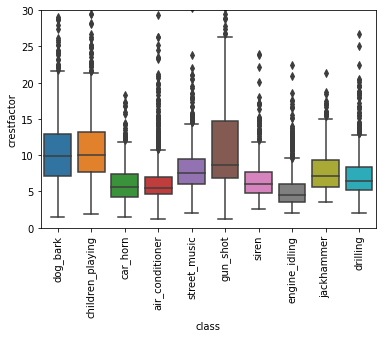

In [27]:
feature_boxplot('crestfactor', [0, 30])

## Spectral rolloff

A measure of the frequency below which 85% of the power is contained, as a function of time. Here, the median and the IQR (inter-quartile range) pick up different classes: A high median, meaning a consistently high rolloff frequency within the considered window of time, indicates drilling or jackhammering. A high IQR, meaning large variation within the considered window, preferentially indicates gun shots, possibly due to the 'suddenness', akin to the crestfactor feature.

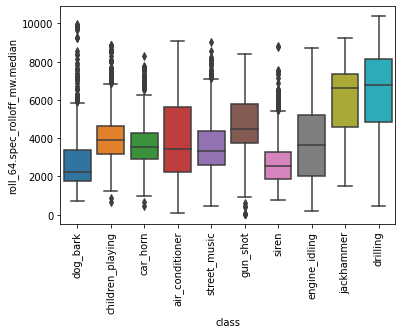

In [53]:
feature_boxplot('roll_64.spec_rolloff_mw.median')

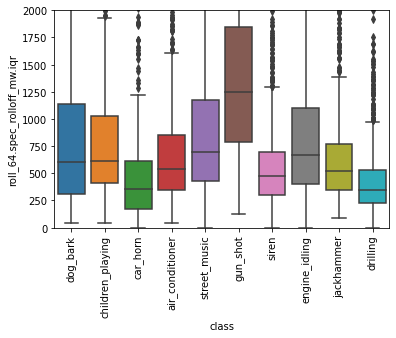

In [54]:
feature_boxplot('roll_64.spec_rolloff_mw.iqr',[0,2000])

## Zero crossing rate

A high zero crossing rate within a chosen time window seems to indicate drilling or jackhammering, possibly due to the consistency of repetitiveness of those sounds compared to, say, street music playing varying notes.

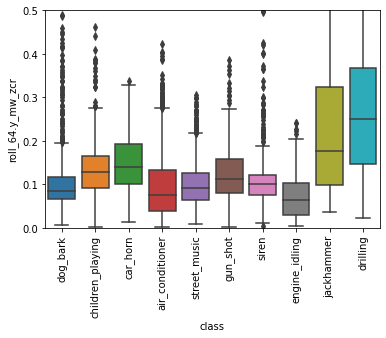

In [57]:
feature_boxplot('roll_64.y_mw_zcr',[0,0.5])

## Minimal spectral flatness

As a measure of how close to white noise a sound is, the minimal spectral flatness in a considered window seems to be much higher for drilling and jackhammering. As with the zero crossing rate, this might be because of the consistency of the drilling and jackhammering sound, meaning that the minimum picked up flatness remains high in the whole window, unlike briefer sounds.

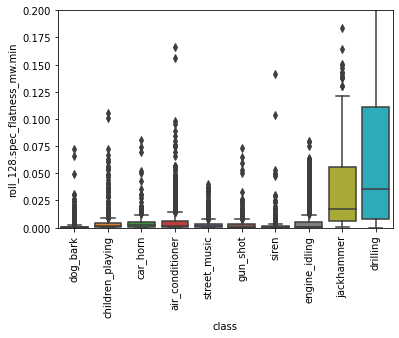

In [24]:
feature_boxplot('roll_128.spec_flatness_mw.min', [0,.2])

## Fundamental frequency IQR

As 'standard' sirens tend to oscillate between two clear tones, the inter-quartile range of the fundamental frequency estimate seems to strongly pick them out from the other classes.

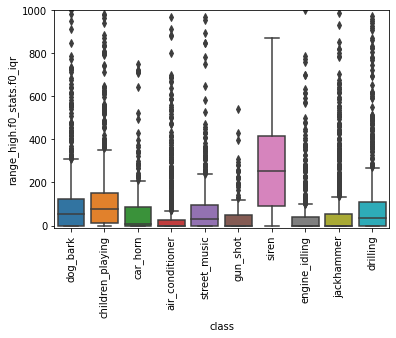

In [20]:
feature_boxplot('range_high.f0_stats.f0_iqr', [-10, 1000])